In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as sns
import talib 
from sklearn.preprocessing import MinMaxScaler



In [3]:
scaler = MinMaxScaler()

In [4]:
ticker = ['^DJI', '^N225', '^HSI', '000001.SS']

In [5]:
data = pdr.get_data_yahoo(ticker, start="2017-01-01", end="2021-12-31")
data = data.fillna(method='bfill')
data = data.fillna(method='ffill')
data

Attributes     Adj Close                                           \
Symbols             ^DJI         ^N225          ^HSI    000001.SS   
Date                                                                
2017-01-03  19881.759766  19594.160156  22150.400391  3135.920898   
2017-01-04  19942.160156  19594.160156  22134.470703  3158.793945   
2017-01-05  19899.289062  19520.689453  22456.689453  3165.410889   
2017-01-06  19963.800781  19454.330078  22503.009766  3154.321045   
2017-01-09  19887.380859  19301.439453  22558.689453  3171.236084   
...                  ...           ...           ...          ...   
2021-11-12  36100.308594  29609.970703  25327.970703  3539.100098   
2021-11-15  36087.449219  29776.800781  25390.910156  3533.300049   
2021-11-16  36142.218750  29808.119141  25713.779297  3521.790039   
2021-11-17  35931.050781  29688.330078  25650.080078  3537.370117   
2021-11-18  35931.050781  29598.660156  25311.439453  3526.093750   

Attributes         Close                                           \
Symbols             ^DJI         ^N225          ^HSI    000001.SS   
Date                                                                
2017-01-03  19881.759766  19594.160156  22150.400391  3135.920898   
2017-01-04  19942.160156  19594.160156  22134.470703  3158.793945   
2017-01-05  19899.289062  19520.689453  22456.689453  3165.410889   
2017-01-06  19963.800781  19454.330078  22503.009766  3154.321045   
2017-01-09  19887.380859  19301.439453  22558.689453  3171.236084   
...                  ...           ...           ...          ...   
2021-11-12  36100.308594  29609.970703  25327.970703  3539.100098   
2021-11-15  36087.449219  29776.800781  25390.910156  3533.300049   
2021-11-16  36142.218750  29808.119141  25713.779297  3521.790039   
2021-11-17  35931.050781  29688.330078  25650.080078  3537.370117   
2021-11-18  35931.050781  29598.660156  25311.439453  3526.093750   

Attributes          High                ...           Low               \
Symbols             ^DJI         ^N225  ...          ^HSI    000001.SS   
Date                                    ...                              
2017-01-03  19938.529297  19594.160156  ...  21883.820312  3105.309082   
2017-01-04  19956.140625  19594.160156  ...  22076.630859  3130.114990   
2017-01-05  19948.599609  19615.400391  ...  22230.310547  3154.281006   
2017-01-06  19999.630859  19472.369141  ...  22445.779297  3153.024902   
2017-01-09  19943.779297  19484.900391  ...  22476.349609  3147.735107   
...                  ...           ...  ...           ...          ...   
2021-11-12  36147.628906  29661.220703  ...  25210.560547  3527.389893   
2021-11-15  36236.070312  29861.880859  ...  25230.330078  3521.290039   
2021-11-16  36316.609375  29960.929688  ...  25410.869141  3517.810059   
2021-11-17  36159.699219  29909.970703  ...  25520.669922  3513.520020   
2021-11-18  36159.699219  29715.949219  ...  25222.599609  3513.113525   

Attributes          Open                                           \
Symbols             ^DJI         ^N225          ^HSI    000001.SS   
Date                                                                
2017-01-03  19872.859375  19298.679688  21993.359375  3105.309082   
2017-01-04  19890.939453  19298.679688  22201.080078  3133.787109   
2017-01-05  19924.560547  19602.099609  22302.640625  3157.906006   
2017-01-06  19906.960938  19393.550781  22583.289062  3163.775879   
2017-01-09  19931.410156  19414.830078  22561.109375  3148.531982   
...                  ...           ...           ...          ...   
2021-11-12  35963.781250  29381.449219  25522.830078  3534.149902   
2021-11-15  36128.828125  29807.369141  25437.990234  3542.899902   
2021-11-16  36076.179688  29749.710938  25446.650391  3530.459961   
2021-11-17  36159.699219  29906.679688  25667.810547  3518.560059   
2021-11-18  36159.699219  29597.929688  25369.880859  3531.492188   

Attributes       Volume                                       

In [33]:
dji = pdr.get_data_yahoo('^DJI', start='2017-01-1', end='2021-12-31')
dji

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,19938.529297,19775.929688,19872.859375,19881.759766,339180000,19881.759766
2017-01-04,19956.140625,19878.830078,19890.939453,19942.160156,280010000,19942.160156
2017-01-05,19948.599609,19811.119141,19924.560547,19899.289062,269920000,19899.289062
2017-01-06,19999.630859,19834.080078,19906.960938,19963.800781,277700000,19963.800781
2017-01-09,19943.779297,19887.380859,19931.410156,19887.380859,287510000,19887.380859
...,...,...,...,...,...,...
2021-11-11,36108.171875,35915.269531,36038.781250,35921.230469,270320000,35921.230469
2021-11-12,36147.628906,35934.589844,35963.781250,36100.308594,293180000,36100.308594
2021-11-15,36236.070312,36031.781250,36128.828125,36087.449219,280660000,36087.449219


In [7]:
dji_norm = pd.DataFrame(scaler.fit_transform(dji), columns=dji.columns)
dji_norm


,High,Low,Open,Close,Volume,Adj Close
0,0.046863,0.086215,0.048568,0.072299,0.304914,0.072299
1,0.047873,0.091893,0.049607,0.075684,0.233611,0.075684
2,0.047441,0.088157,0.051541,0.073281,0.221452,0.073281
3,0.050366,0.089424,0.050529,0.076897,0.230828,0.076897
4,0.047164,0.092365,0.051935,0.072614,0.242649,0.072614
...,...,...,...,...,...,...
1224,0.973771,0.976869,0.978279,0.971358,0.221934,0.971358
1225,0.976033,0.977935,0.973966,0.981395,0.249482,0.981395
1226,0.981103,0.983299,0.983458,0.980675,0.234395,0.980675
1227,0.985719,0.985749,0.980430,0.983745,0.267690,0.983745


In [35]:
n225 = pdr.get_data_yahoo("^N225", start="2017-01-01", end="2021-12-31")
n225

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-04,19594.160156,19277.929688,19298.679688,19594.160156,163500000.0,19594.160156
2017-01-05,19615.400391,19473.279297,19602.099609,19520.689453,134500000.0,19520.689453
2017-01-06,19472.369141,19354.439453,19393.550781,19454.330078,119100000.0,19454.330078
2017-01-10,19484.900391,19255.349609,19414.830078,19301.439453,119100000.0,19301.439453
2017-01-11,19402.169922,19325.460938,19358.640625,19364.669922,119100000.0,19364.669922
...,...,...,...,...,...,...
2021-11-12,29661.220703,29381.449219,29381.449219,29609.970703,68400000.0,29609.970703
2021-11-15,29861.880859,29718.210938,29807.369141,29776.800781,60400000.0,29776.800781
2021-11-16,29960.929688,29681.250000,29749.710938,29808.119141,62000000.0,29808.119141


In [9]:
n225_norm = pd.DataFrame(scaler.fit_transform(n225), columns=n225.columns)
n225_norm

,High,Low,Open,Close,Volume,Adj Close
0,0.185144,0.206391,0.194371,0.215433,0.700514,0.215433
1,0.186689,0.220200,0.215989,0.210229,0.576264,0.210229
2,0.176285,0.211800,0.201130,0.205528,0.510283,0.205528
3,0.177196,0.204795,0.202646,0.194698,0.510283,0.194698
4,0.171178,0.209751,0.198643,0.199177,0.510283,0.199177
...,...,...,...,...,...,...
1187,0.917467,0.920592,0.912743,0.924906,0.293059,0.924906
1188,0.932064,0.944397,0.943089,0.936723,0.258783,0.936723
1189,0.939269,0.941784,0.938981,0.938941,0.265638,0.938941
1190,0.935562,0.937722,0.950164,0.930456,0.273779,0.930456


In [37]:
hsi = pdr.get_data_yahoo("^HSI", start="2017-01-01", end="2021-12-31")
hsi

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,22189.310547,21883.820312,21993.359375,22150.400391,1.302378e+09,22150.400391
2017-01-04,22228.060547,22076.630859,22201.080078,22134.470703,1.437672e+09,22134.470703
2017-01-05,22483.009766,22230.310547,22302.640625,22456.689453,1.830652e+09,22456.689453
2017-01-06,22605.660156,22445.779297,22583.289062,22503.009766,1.389974e+09,22503.009766
2017-01-09,22626.429688,22476.349609,22561.109375,22558.689453,1.303533e+09,22558.689453
...,...,...,...,...,...,...
2021-11-12,25527.130859,25210.560547,25522.830078,25327.970703,1.632112e+09,25327.970703
2021-11-15,25483.259766,25230.330078,25437.990234,25390.910156,1.155801e+09,25390.910156
2021-11-16,25746.710938,25410.869141,25446.650391,25713.779297,1.528784e+09,25713.779297


In [11]:
hsi_norm = pd.DataFrame(scaler.fit_transform(hsi), columns=hsi.columns)
hsi_norm

,High,Low,Open,Close,Volume,Adj Close
0,0.041838,0.063325,0.025537,0.039647,0.226814,0.039647
1,0.045125,0.079723,0.043383,0.038256,0.250376,0.038256
2,0.066753,0.092794,0.052109,0.066378,0.318815,0.066378
3,0.077158,0.111120,0.076221,0.070421,0.242069,0.070421
4,0.078919,0.113720,0.074315,0.075280,0.227015,0.075280
...,...,...,...,...,...,...
1198,0.324993,0.346264,0.328773,0.316970,0.284238,0.316970
1199,0.321271,0.347946,0.321484,0.322463,0.201287,0.322463
1200,0.343620,0.363301,0.322228,0.350642,0.266243,0.350642
1201,0.336927,0.372639,0.341229,0.345082,0.207906,0.345082


In [39]:
sse = pdr.get_data_yahoo("000001.SS", start="2017-01-01", end="2021-12-31")
sse

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,3136.456055,3105.309082,3105.309082,3135.920898,141600,3135.920898
2017-01-04,3160.103027,3130.114990,3133.787109,3158.793945,167900,3158.793945
2017-01-05,3168.501953,3154.281006,3157.906006,3165.410889,174700,3165.410889
2017-01-06,3172.034912,3153.024902,3163.775879,3154.321045,183700,3154.321045
2017-01-09,3173.135986,3147.735107,3148.531982,3171.236084,171700,3171.236084
...,...,...,...,...,...,...
2021-11-12,3543.649902,3527.389893,3534.149902,3539.100098,308700,3539.100098
2021-11-15,3550.439941,3521.290039,3542.899902,3533.300049,313000,3533.300049
2021-11-16,3549.770020,3517.810059,3530.459961,3521.790039,310400,3521.790039


In [13]:
sse_norm = pd.DataFrame(scaler.fit_transform(sse), columns=sse.columns)
sse_norm

,High,Low,Open,Close,Volume,Adj Close
0,0.521214,0.530709,0.517063,0.536814,0.000025,0.536814
1,0.540235,0.550524,0.539397,0.555098,0.000037,0.555098
2,0.546990,0.569827,0.558313,0.560387,0.000040,0.560387
3,0.549832,0.568824,0.562917,0.551522,0.000045,0.551522
4,0.550718,0.564598,0.550961,0.565043,0.000039,0.565043
...,...,...,...,...,...,...
1179,0.848748,0.867858,0.853391,0.859098,0.000103,0.859098
1180,0.854210,0.862986,0.860253,0.854461,0.000105,0.854461
1181,0.853671,0.860206,0.850497,0.845261,0.000104,0.845261
1182,0.843810,0.856779,0.841164,0.857715,0.000088,0.857715


In [52]:
df = pd.concat([dji_norm,n225_norm,hsi_norm,sse_norm], keys=['DJI','N225','HSI','SSE'])
df

High       Low      Open     Close    Volume  Adj Close
DJI 0     0.046863  0.086215  0.048568  0.072299  0.304914   0.072299
    1     0.047873  0.091893  0.049607  0.075684  0.233611   0.075684
    2     0.047441  0.088157  0.051541  0.073281  0.221452   0.073281
    3     0.050366  0.089424  0.050529  0.076897  0.230828   0.076897
    4     0.047164  0.092365  0.051935  0.072614  0.242649   0.072614
...            ...       ...       ...       ...       ...        ...
SSE 1179  0.848748  0.867858  0.853391  0.859098  0.000103   0.859098
    1180  0.854210  0.862986  0.860253  0.854461  0.000105   0.854461
    1181  0.853671  0.860206  0.850497  0.845261  0.000104   0.845261
    1182  0.843810  0.856779  0.841164  0.857715  0.000088   0.857715
    1183  0.844184  0.856454  0.851306  0.848187  1.000000   0.848187

[4808 rows x 6 columns]

In [53]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [15]:
# series[0]

In [16]:
# for i in range(4):
#     data.loc[['RSI'][close.columns.values[i]]] = ta.RSI(series[i], timeperiod=14) 
# data

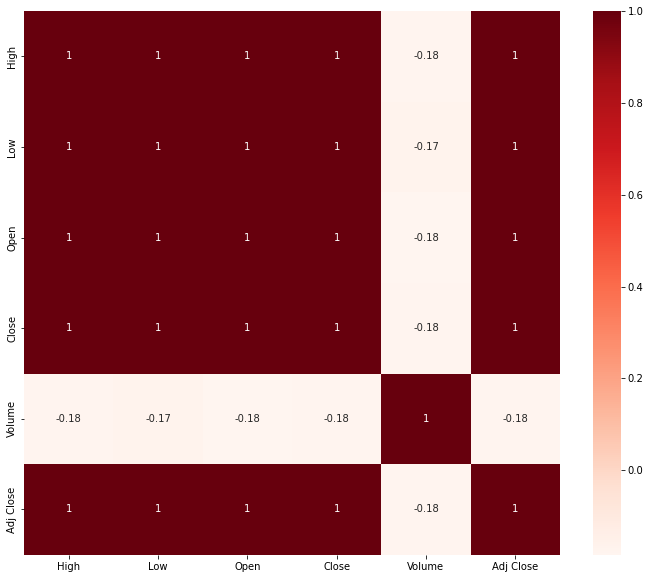

In [54]:
# Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
#cor_target['^DJI']

In [55]:
cor_target = abs(cor["Close"])
features = cor_target[cor_target>0.5]
features

High         0.997964
Low          0.998078
Open         0.996332
Close        1.000000
Adj Close    1.000000
Name: Close, dtype: float64

<h2>จากการทำ Feature Selection ควรจะใช้ High, Low, Open, Close, Adj Close ในการสร้างโมเดล</h2>

In [56]:
close = df['Close']
high = df['High']
low = df['Low']
open = df['Open']
volume  = df['Volume']

In [57]:
ti = pd.DataFrame()
ti['RSI14'] = talib.RSI(close, timeperiod=14)
ti['ADX'] = talib.ADX(high, low, close, timeperiod=14)
ti['ADXR'] = talib.ADXR(high, low, close, timeperiod=14)
ti['aroondown'], ti['aroonup'] = talib.AROON(high, low, timeperiod=14)
ti['APO'] = talib.APO(close, fastperiod=12, slowperiod=26, matype=0)
ti['AROONOSC'] = talib.AROONOSC(high, low, timeperiod=14)
ti['BOP'] = talib.BOP(open, high, low, close)
ti['CCI'] = talib.CCI(high, low, close, timeperiod=14)
ti['CMO'] = talib.CMO(close, timeperiod=14)
ti['DX'] = talib.DX(high, low, close, timeperiod=14)
ti['macd'],ti['macdsignal'],ti['macdhist'] = talib.MACD(close, fastperiod = 12, slowperiod=26, signalperiod=9)
ti['MFI'] = talib.MFI(high, low, close, volume, timeperiod=14)
ti['MINUS_DI'] = talib.MINUS_DI(high, low, close, timeperiod=14)
ti['MINUS_DM'] = talib.MINUS_DM(high, low, timeperiod=14)
ti['MOM'] = talib.MOM(close, timeperiod=14)
ti['PLUS_DI'] = talib.PLUS_DI(high, low, close, timeperiod=14)
ti['PLUS_DM'] = talib.PLUS_DM(high, low, timeperiod=14)
ti['PPO'] = talib.PPO(close, fastperiod=12, slowperiod=26, matype=0)
ti['ROC'] = talib.ROC(close, timeperiod=10)
ti['ROCP'] = talib.ROCP(close, timeperiod=10)
ti['ROCR'] = talib.ROCR(close, timeperiod=10)
ti['ROCR100'] = talib.ROCR100(close, timeperiod=10)
ti['slowk'], ti['slowd'] = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowd_period=3, slowd_matype=0)
ti['fastk'], ti['fastd'] = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
ti['TRIX'] = talib.TRIX(close, timeperiod=30)
ti['ULTOSC'] = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
ti['WILLR'] = talib.WILLR(high, low, close, timeperiod=14)
ti['Close'] = close
ti

RSI14        ADX       ADXR  aroondown    aroonup       APO  \
DJI 0           NaN        NaN        NaN        NaN        NaN       NaN   
    1           NaN        NaN        NaN        NaN        NaN       NaN   
    2           NaN        NaN        NaN        NaN        NaN       NaN   
    3           NaN        NaN        NaN        NaN        NaN       NaN   
    4           NaN        NaN        NaN        NaN        NaN       NaN   
...             ...        ...        ...        ...        ...       ...   
SSE 1179  48.965242  26.605559  22.145194  85.714286   7.142857 -0.027119   
    1180  47.934350  25.900461  21.905054  78.571429   0.000000 -0.024318   
    1181  45.870457  25.332647  22.156000  71.428571   0.000000 -0.023870   
    1182  49.067261  24.916937  22.503564  64.285714  21.428571 -0.024049   
    1183  46.790492  24.511831  22.646378  57.142857  14.285714 -0.021613   

           AROONOSC  BOP        CCI       CMO  ...      ROCR     ROCR100  \
DJI 0           NaN  0.0        NaN       NaN  ...       NaN         NaN   
    1           NaN  0.0        NaN       NaN  ...       NaN         NaN   
    2           NaN  0.0        NaN       NaN  ...       NaN         NaN   
    3           NaN  0.0        NaN       NaN  ...       NaN         NaN   
    4           NaN  0.0        NaN       NaN  ...       NaN         NaN   
...             ...  ...        ...       ...  ...       ...         ...   
SSE 1179 -78.571429  0.0  35.653784 -2.069516  ...  0.992391   99.239135   
    1180 -78.571429  0.0  59.306649 -4.131301  ...  0.989649   98.964933   
    1181 -71.428571  0.0  59.292949 -8.259087  ...  1.015520  101.551971   
    1182 -42.857143  0.0  56.155462 -1.865479  ...  1.037547  103.754684   
    1183 -42.857143  0.0  42.189634 -6.419015  ...  0.998664   99.866384   

               slowk       slowd       fastk       fastd      TRIX     ULTOSC  \
DJI 0            NaN         NaN         NaN         NaN       NaN        NaN   
    1            NaN         NaN         NaN         NaN       NaN        NaN   
    2            NaN         NaN         NaN         NaN       NaN        NaN   
    3            NaN         NaN         NaN         NaN       NaN        NaN   
    4            NaN         NaN         NaN         NaN       NaN        NaN   
...              ...         ...         ...         ...       ...        ...   
SSE 1179  104.461360   73.295207  123.545238  104.461360  0.016625  47.344542   
    1180  119.852130  101.770076  100.507977  119.852130  0.008057  38.896372   
    1181  101.980786  108.764758   81.889143  101.980786 -0.000065  46.330790   
    1182   99.455347  107.096088  115.968921   99.455347 -0.007344  54.495482   
    1183  188.752310  130.062814  368.398867  188.752310 -0.014138  39.696626   

              WILLR     Close  
DJI 0           NaN  0.072299  
    1           NaN  0.075684  
    2           NaN  0.073281  
    3           NaN  0.076897  
    4           NaN  0.072614  
...             ...       ...  
SSE 1179 -50.365544  0.859098  
    1180 -38.776963  0.854461  
    1181 -28.177037  0.845261  
    1182  -6.072398  0.857715  
    1183 -22.983749  0.848187  

[4808 rows x 33 columns]

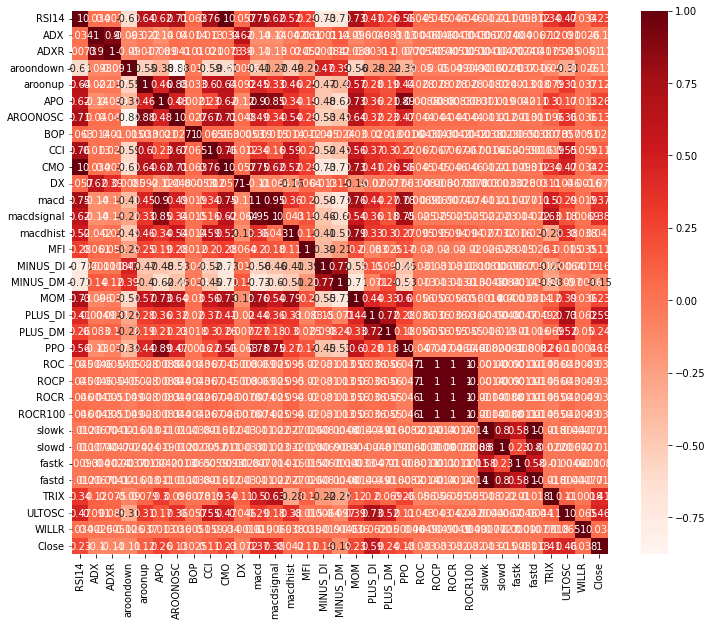

In [58]:
plt.figure(figsize=(12,10))
cor = ti.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [59]:
cor_target = abs(cor["Close"])
features = cor_target[cor_target>0.2]
features

RSI14         0.233318
APO           0.260643
CMO           0.233318
macd          0.365026
macdsignal    0.376792
MOM           0.231051
PLUS_DI       0.592081
PLUS_DM       0.236698
TRIX          0.413160
ULTOSC        0.457301
Close         1.000000
Name: Close, dtype: float64

<h2>จากการทำ Feature Selection ควรจะใช้ RSI14, APO, CMO, macd, macdsignal, MINUS_DI, MINUS_DM, MOM, PLUS_DI, PPO, ROC, ROCP, ROCP, ROCR100 ในการสร้าง model</h2>

No handles with labels found to put in legend.


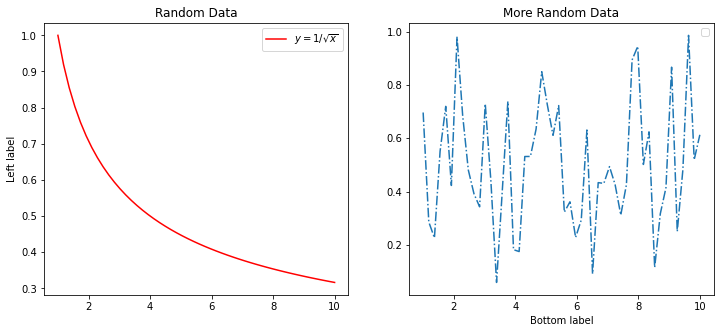

In [42]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

# Some generic data to fill our chart:
x = df['Date']
y1 = 1/np.sqrt(x)
y2 = np.random.random(50)

# Create our figure and specify the size:
fig = plt.figure(figsize=(12, 5))

# Create the subplots and assign them to a variable name:
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# Now plot the data on each of the subplots
ax1.plot(x, y1, color='red', label=('$y = 1/\sqrt{x}$'))
ax2.plot(x, y2, linestyle='-.')

# Add a title to each subplot
ax1.set_title('Random Data')
ax2.set_title('More Random Data')

# Add labels to the horizontal and vertical axes
ax1.set_ylabel('Left label')
ax2.set_xlabel('Bottom label')

# This is how we make the legends visible in the subplots:
ax1.legend()
ax2.legend()

plt.show()